Linear Regression RMSE for NJ: 1596074.3607497062
Polynomial Regression RMSE for NJ (degree=3): 305498.322237138


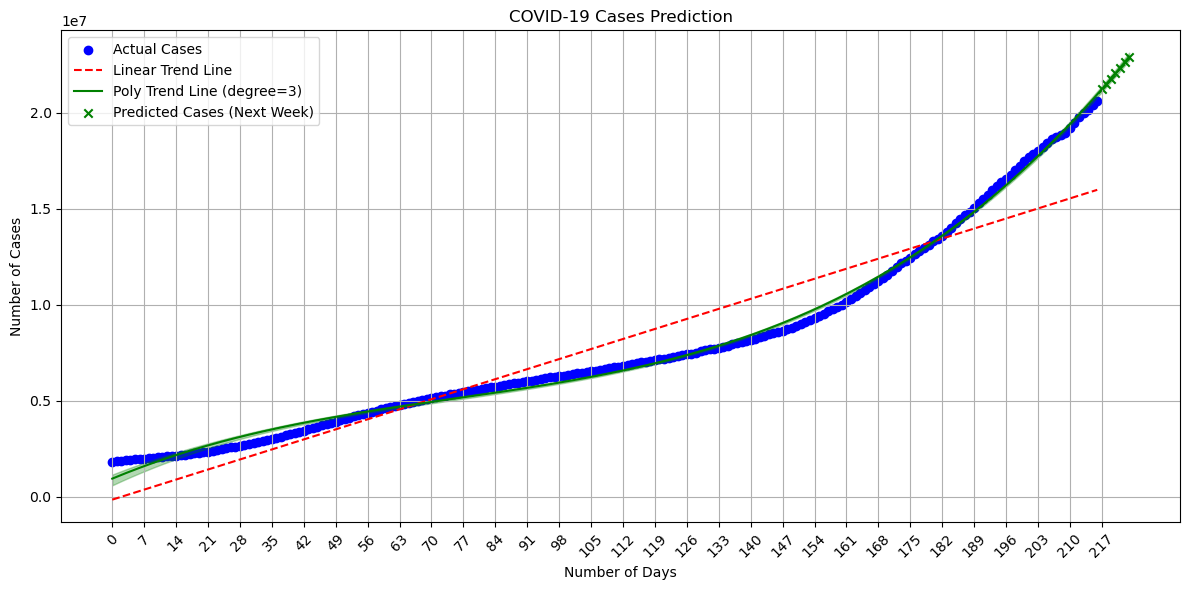

In [1]:
################################################################################################################################
######################################################## TEAM ##################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data = covid_cases_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
cases_data = covid_cases_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, cases_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(cases_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(cases_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")

# Bootstrap to calculate confidence interval
n_bootstraps = 1000
bootstrap_predictions = []
for _ in range(n_bootstraps):
    indices = np.random.choice(len(cases_data), size=len(cases_data), replace=True)
    X_boot = X_poly[indices]
    y_boot = cases_data[indices]
    reg_boot = LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
    
# Calculate confidence interval
confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

# Flatten confidence interval arrays
confidence_interval_lower = confidence_interval[0].flatten()
confidence_interval_upper = confidence_interval[1].flatten()

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line and confidence interval
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range) + 7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
cases_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

Linear Regression RMSE for NJ: 13545.924691430659
Polynomial Regression RMSE for NJ (degree=3): 4762.935748761434


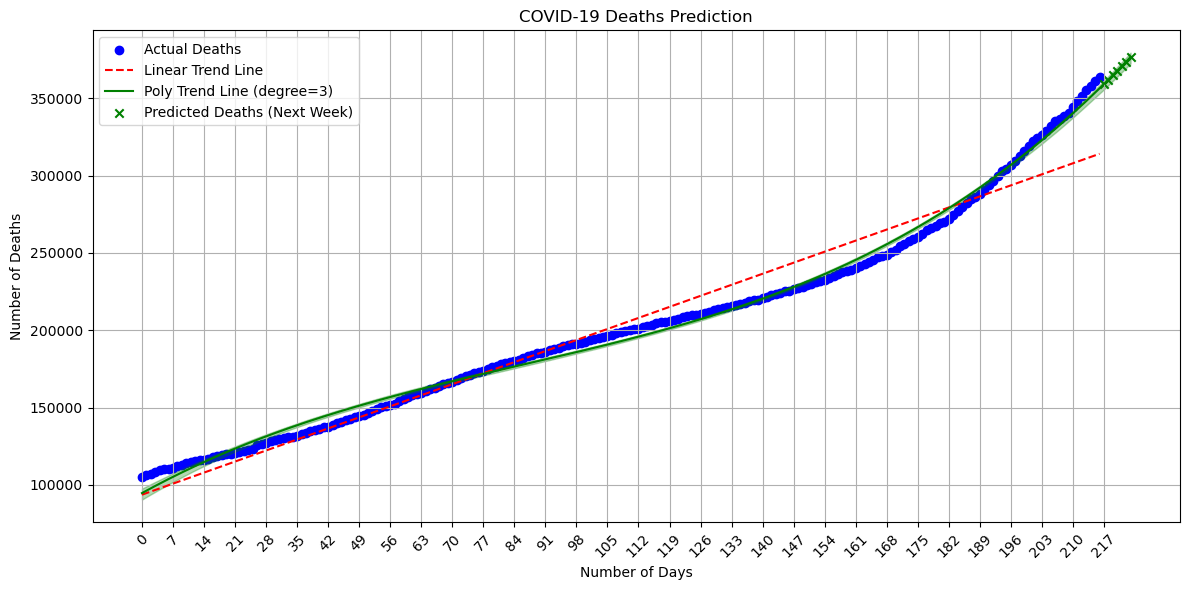

In [2]:
################################################################################################################################
######################################################## TEAM ##################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data = covid_deaths_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
deaths_data = covid_deaths_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, deaths_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(deaths_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, deaths_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(deaths_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")

# Bootstrap to calculate confidence interval
n_bootstraps = 1000
bootstrap_predictions = []
for _ in range(n_bootstraps):
    indices = np.random.choice(len(deaths_data), size=len(deaths_data), replace=True)
    X_boot = X_poly[indices]
    y_boot = deaths_data[indices]
    reg_boot = LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
    
# Calculate confidence interval
confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

# Flatten confidence interval arrays
confidence_interval_lower = confidence_interval[0].flatten()
confidence_interval_upper = confidence_interval[1].flatten()

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, deaths_data, color='blue', label='Actual Deaths')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line and confidence interval
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range) + 7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
deaths_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, deaths_pred, color='green', marker='x', label='Predicted Deaths (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

TODO: Discuss bias versus variance tradeoff.
      Describe the trends as compared to other countries.

Linear Regression RMSE for NJ: 49034.32916973638
Polynomial Regression RMSE for NJ (degree=3): 6784.317444979545


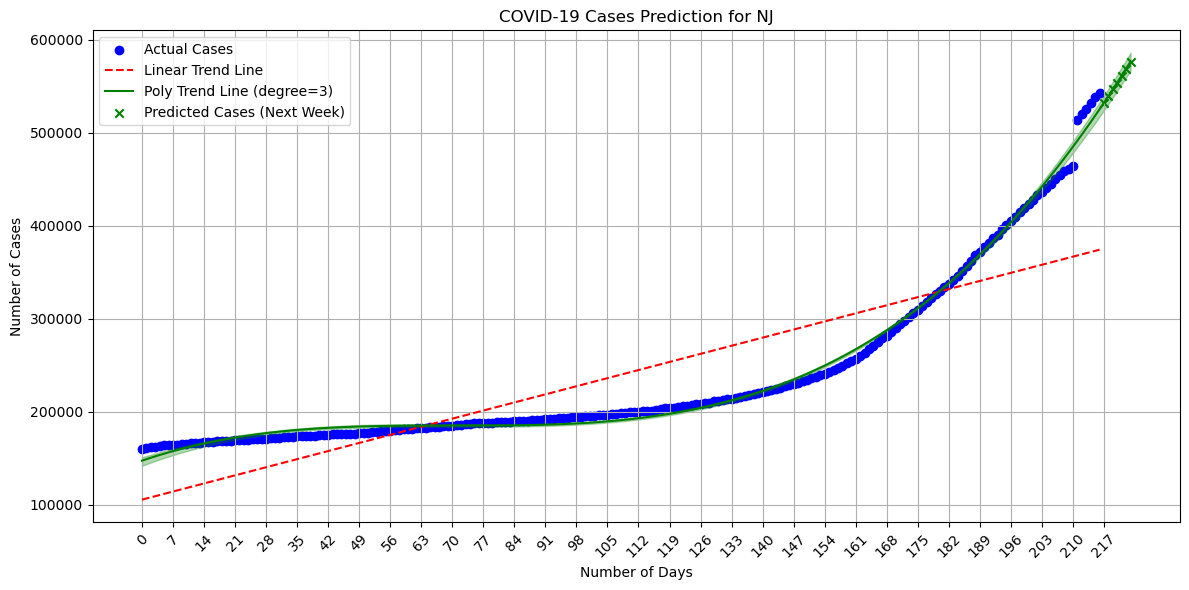

In [3]:
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter by state
covid_cases_data = covid_cases_data[covid_cases_data['State'] == 'NJ']

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data = covid_cases_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
cases_data = covid_cases_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, cases_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(cases_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(cases_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")

# Bootstrap to calculate confidence interval
n_bootstraps = 1000
bootstrap_predictions = []
for _ in range(n_bootstraps):
    indices = np.random.choice(len(cases_data), size=len(cases_data), replace=True)
    X_boot = X_poly[indices]
    y_boot = cases_data[indices]
    reg_boot = LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
    
# Calculate confidence interval
confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

# Flatten confidence interval arrays
confidence_interval_lower = confidence_interval[0].flatten()
confidence_interval_upper = confidence_interval[1].flatten()

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line and confidence interval
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range) + 7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
cases_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction for NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

Linear Regression RMSE for NJ: 740.0197842776906
Polynomial Regression RMSE for NJ (degree=3): 276.40750507925344


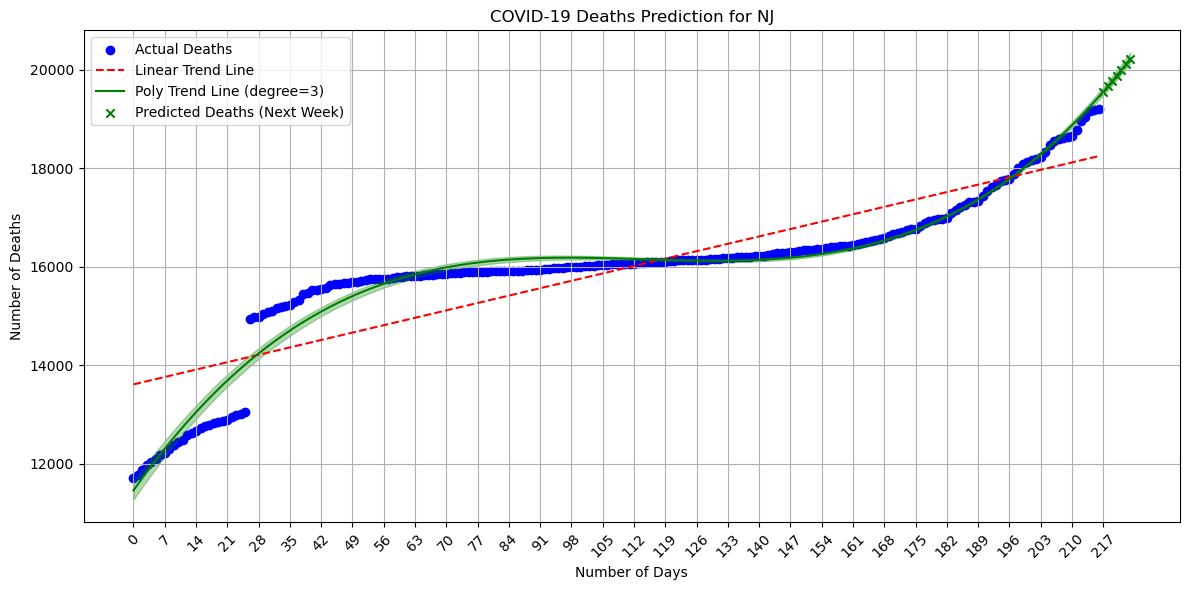

In [4]:
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter by state
covid_deaths_data = covid_deaths_data[covid_deaths_data['State'] == 'NJ']

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data = covid_deaths_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
deaths_data = covid_deaths_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, deaths_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(deaths_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, deaths_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(deaths_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")

# Bootstrap to calculate confidence interval
n_bootstraps = 1000
bootstrap_predictions = []
for _ in range(n_bootstraps):
    indices = np.random.choice(len(deaths_data), size=len(deaths_data), replace=True)
    X_boot = X_poly[indices]
    y_boot = deaths_data[indices]
    reg_boot = LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
    
# Calculate confidence interval
confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

# Flatten confidence interval arrays
confidence_interval_lower = confidence_interval[0].flatten()
confidence_interval_upper = confidence_interval[1].flatten()

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, deaths_data, color='blue', label='Actual Deaths')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line and confidence interval
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range) + 7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
deaths_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, deaths_pred, color='green', marker='x', label='Predicted Deaths (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction for NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

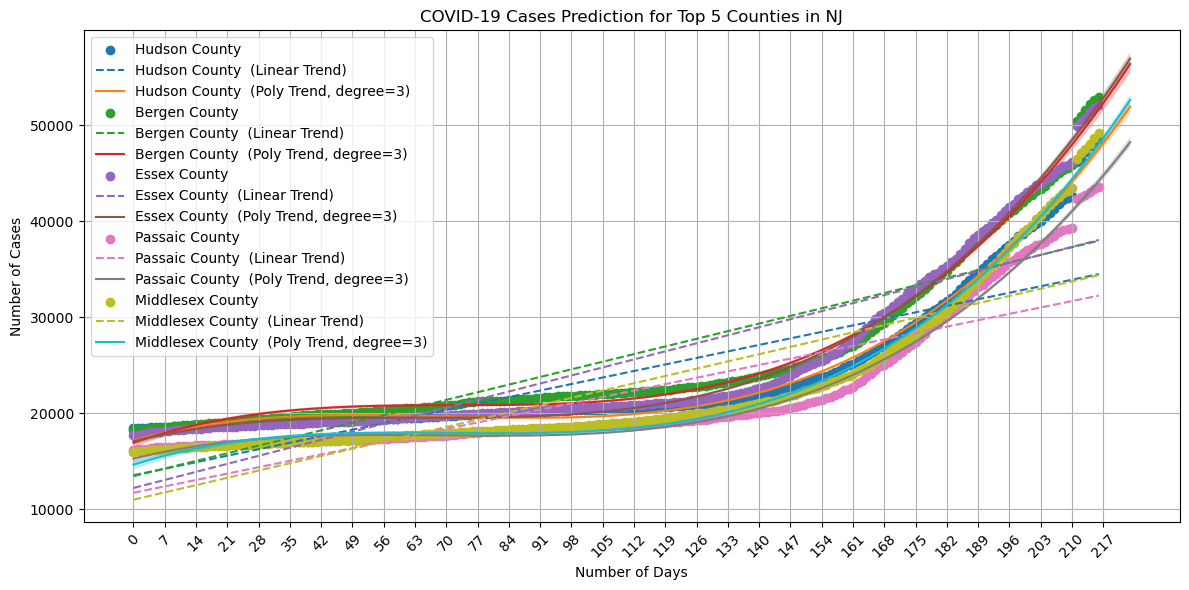

Hudson County  - Linear Regression RMSE: 4247.505070330437, Polynomial Regression RMSE (degree=3): 547.6618463503534
Bergen County  - Linear Regression RMSE: 4427.9679723435975, Polynomial Regression RMSE (degree=3): 674.1516491174718
Essex County  - Linear Regression RMSE: 4715.093368401734, Polynomial Regression RMSE (degree=3): 589.1054174779665
Passaic County  - Linear Regression RMSE: 3932.3576549048994, Polynomial Regression RMSE (degree=3): 633.7142161570376
Middlesex County  - Linear Regression RMSE: 4410.671355414672, Polynomial Regression RMSE (degree=3): 563.2259970331519


In [5]:
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter data for the state of 'NJ'
covid_cases_data_nj = covid_cases_data[covid_cases_data['State'] == 'NJ']

# Calculate total cases for each county
county_cases = covid_cases_data_nj.groupby('County Name').sum()

# Sort counties based on total cases
county_cases_sorted = county_cases.sort_values(by='2020-06-01', ascending=False)

# Get the top 5 counties with the most cases
top_5_counties = county_cases_sorted.head(5)

# Select only date columns within the specified range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_columns = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m-%d')

# Prepare data for analysis
cases_data = top_5_counties[date_columns].values
days_since_start = np.arange(len(date_columns)).reshape(-1, 1)

# Initialize lists to store RMSE values for linear and polynomial regression
linear_rmse_list = []
poly_rmse_list = []

# Plotting
plt.figure(figsize=(12, 6))

for county_name, county_cases_data in top_5_counties.iterrows():
    # Fit linear regression model
    reg_linear = LinearRegression().fit(days_since_start, county_cases_data[date_columns].values.reshape(-1, 1))
    linear_predictions = reg_linear.predict(days_since_start)
    linear_rmse = np.sqrt(mean_squared_error(county_cases_data[date_columns].values, linear_predictions))
    linear_rmse_list.append(linear_rmse)

    # Fit polynomial regression model
    degree = 3  # Change this if you want
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(days_since_start)
    reg_poly = LinearRegression().fit(X_poly, county_cases_data[date_columns].values.reshape(-1, 1))
    poly_predictions = reg_poly.predict(X_poly)
    poly_rmse = np.sqrt(mean_squared_error(county_cases_data[date_columns].values, poly_predictions))
    poly_rmse_list.append(poly_rmse)

    # Bootstrap to calculate confidence interval
    n_bootstraps = 1000
    bootstrap_predictions = []
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(county_cases_data[date_columns]), size=len(county_cases_data[date_columns]), replace=True)
        X_boot = X_poly[indices]
        y_boot = county_cases_data[date_columns].values[indices]
        reg_boot = LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
        X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
        bootstrap_predictions.append(reg_boot.predict(X_plot_poly))

    # Calculate confidence interval
    confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

    # Flatten confidence interval arrays
    confidence_interval_lower = confidence_interval[0].flatten()
    confidence_interval_upper = confidence_interval[1].flatten()

    # Plot actual data
    plt.scatter(days_since_start, county_cases_data[date_columns].values, label=county_name)

    # Plot linear regression trend line
    plt.plot(days_since_start, reg_linear.predict(days_since_start), linestyle='--', label=f'{county_name} (Linear Trend)')

    # Plot polynomial regression trend line and confidence interval
    X_plot_poly = poly_features.transform(np.arange(len(date_columns) + 7).reshape(-1, 1))
    plt.plot(np.arange(len(date_columns) + 7), reg_poly.predict(X_plot_poly), label=f'{county_name} (Poly Trend, degree={degree})')
    plt.fill_between(np.arange(len(date_columns) + 7), confidence_interval_lower, confidence_interval_upper, alpha=0.3)

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction for Top 5 Counties in NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_columns) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

# Print RMSE values
for i, county_name in enumerate(top_5_counties.index):
    print(f"{county_name} - Linear Regression RMSE: {linear_rmse_list[i]}, Polynomial Regression RMSE (degree={degree}): {poly_rmse_list[i]}")

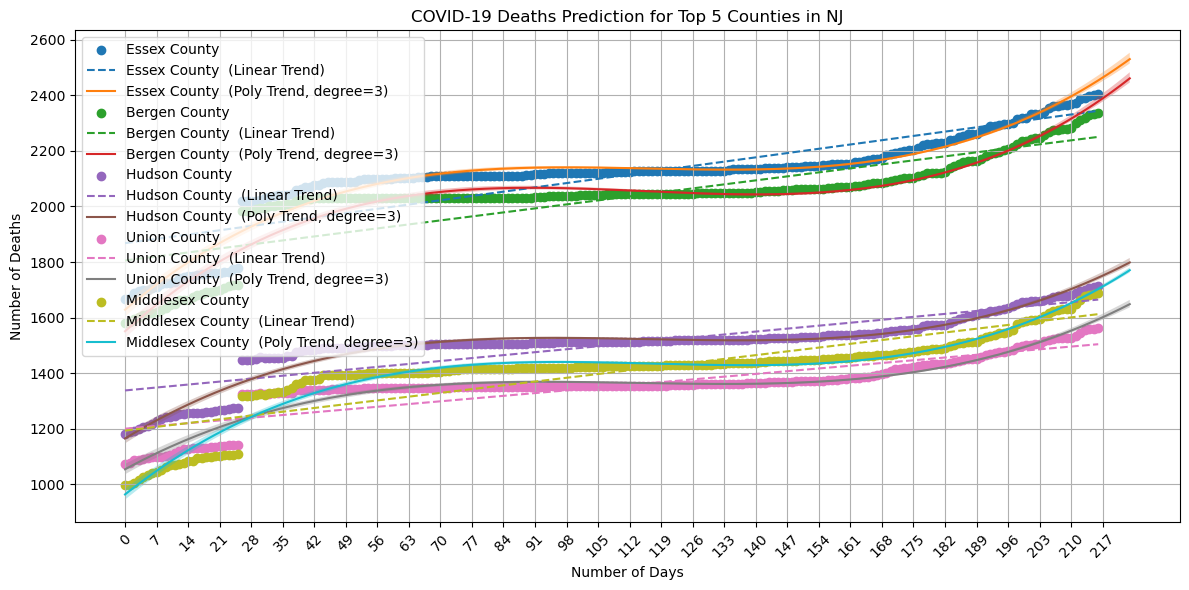

Essex County  - Linear Regression RMSE: 82.0576775779843, Polynomial Regression RMSE (degree=3): 35.610988227344784
Bergen County  - Linear Regression RMSE: 89.79217725692268, Polynomial Regression RMSE (degree=3): 41.33809942061052
Hudson County  - Linear Regression RMSE: 58.85964698328766, Polynomial Regression RMSE (degree=3): 24.85555418632604
Union County  - Linear Regression RMSE: 54.44899623789124, Polynomial Regression RMSE (degree=3): 26.447981494489888
Middlesex County  - Linear Regression RMSE: 75.4623243471779, Polynomial Regression RMSE (degree=3): 28.83040526630238


In [6]:
################################################################################################################################
####################################################### MEMBER #################################################################
################################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter data for the state of 'NJ'
covid_deaths_data_nj = covid_deaths_data[covid_deaths_data['State'] == 'NJ']

# Calculate total deaths for each county
county_deaths = covid_deaths_data_nj.groupby('County Name').sum()

# Sort counties based on total deaths
county_deaths_sorted = county_deaths.sort_values(by='2020-06-01', ascending=False)

# Get the top 5 counties with the most deaths
top_5_counties = county_deaths_sorted.head(5)

# Select only date columns within the specified range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_columns = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m-%d')

# Prepare data for analysis
deaths_data = top_5_counties[date_columns].values
days_since_start = np.arange(len(date_columns)).reshape(-1, 1)

# Initialize lists to store RMSE values for linear and polynomial regression
linear_rmse_list = []
poly_rmse_list = []

# Plotting
plt.figure(figsize=(12, 6))

for county_name, county_deaths_data in top_5_counties.iterrows():
    # Fit linear regression model
    reg_linear = LinearRegression().fit(days_since_start, county_deaths_data[date_columns].values.reshape(-1, 1))
    linear_predictions = reg_linear.predict(days_since_start)
    linear_rmse = np.sqrt(mean_squared_error(county_deaths_data[date_columns].values, linear_predictions))
    linear_rmse_list.append(linear_rmse)

    # Fit polynomial regression model
    degree = 3  # Change this if you want
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(days_since_start)
    reg_poly = LinearRegression().fit(X_poly, county_deaths_data[date_columns].values.reshape(-1, 1))
    poly_predictions = reg_poly.predict(X_poly)
    poly_rmse = np.sqrt(mean_squared_error(county_deaths_data[date_columns].values, poly_predictions))
    poly_rmse_list.append(poly_rmse)

    # Bootstrap to calculate confidence interval
    n_bootstraps = 1000
    bootstrap_predictions = []
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(county_deaths_data[date_columns]), size=len(county_deaths_data[date_columns]), replace=True)
        X_boot = X_poly[indices]
        y_boot = county_deaths_data[date_columns].values[indices]
        reg_boot = LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
        X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
        bootstrap_predictions.append(reg_boot.predict(X_plot_poly))

    # Calculate confidence interval
    confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

    # Flatten confidence interval arrays
    confidence_interval_lower = confidence_interval[0].flatten()
    confidence_interval_upper = confidence_interval[1].flatten()

    # Plot actual data
    plt.scatter(days_since_start, county_deaths_data[date_columns].values, label=county_name)

    # Plot linear regression trend line
    plt.plot(days_since_start, reg_linear.predict(days_since_start), linestyle='--', label=f'{county_name} (Linear Trend)')

    # Plot polynomial regression trend line and confidence interval
    X_plot_poly = poly_features.transform(np.arange(len(date_columns) + 7).reshape(-1, 1))
    plt.plot(np.arange(len(date_columns) + 7), reg_poly.predict(X_plot_poly), label=f'{county_name} (Poly Trend, degree={degree})')
    plt.fill_between(np.arange(len(date_columns) + 7), confidence_interval_lower, confidence_interval_upper, alpha=0.3)

plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction for Top 5 Counties in NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_columns) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

# Print RMSE values
for i, county_name in enumerate(top_5_counties.index):
    print(f"{county_name} - Linear Regression RMSE: {linear_rmse_list[i]}, Polynomial Regression RMSE (degree={degree}): {poly_rmse_list[i]}")